In [6]:
import numpy as np  # linear algebra
import pandas as pd   # data processing, CSV file
import matplotlib.pyplot as plt 
import seaborn as sns

# Data importing, cleaning, preparation

In [8]:
#lets import the dataset and review the first five rows
df = pd.read_csv("/Users/anands/Downloads/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Reviewing the dataset using "describe"

In [11]:
#Lets get some idea what inside the dataset. After running below we see that it has
#some unique values that would be interetsing for further exploration

df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


# Checking for NaN values and replacing them with missing values

In [14]:
#lets print out how many values in each column are NaN
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [18]:
#here we see that some postal codes are missing and we need to revise it. 
#to revise we first need to see which rows have NaN in the postal code column
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [23]:
#its clear (and easy) that one and the same city is missing the postal code
#this means that we just replace all missing values with a needed value
#lets get the postal code for Burlington Vermont
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [27]:
#lets check if we have the full dataset without missing values now
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


# Analysis
# Sales by sub-category and plotting

In [40]:
#how much each sub-category brought in revenue, rounded to 1 decimal point
dfsub = df.groupby(['Sub-Category']).sum().sort_values('Sales',ascending=False).head(20)
dfsub = dfsub[['Sales']].round(1)
dfsub.reset_index(inplace=True)
dfsub


,Sub-Category,Sales
0,Phones,327782.4
1,Chairs,322822.7
2,Storage,219343.4
3,Tables,202810.6
4,Binders,200028.8
5,Machines,189238.6
6,Accessories,164186.7
7,Copiers,146248.1
8,Bookcases,113813.2
9,Appliances,104618.4


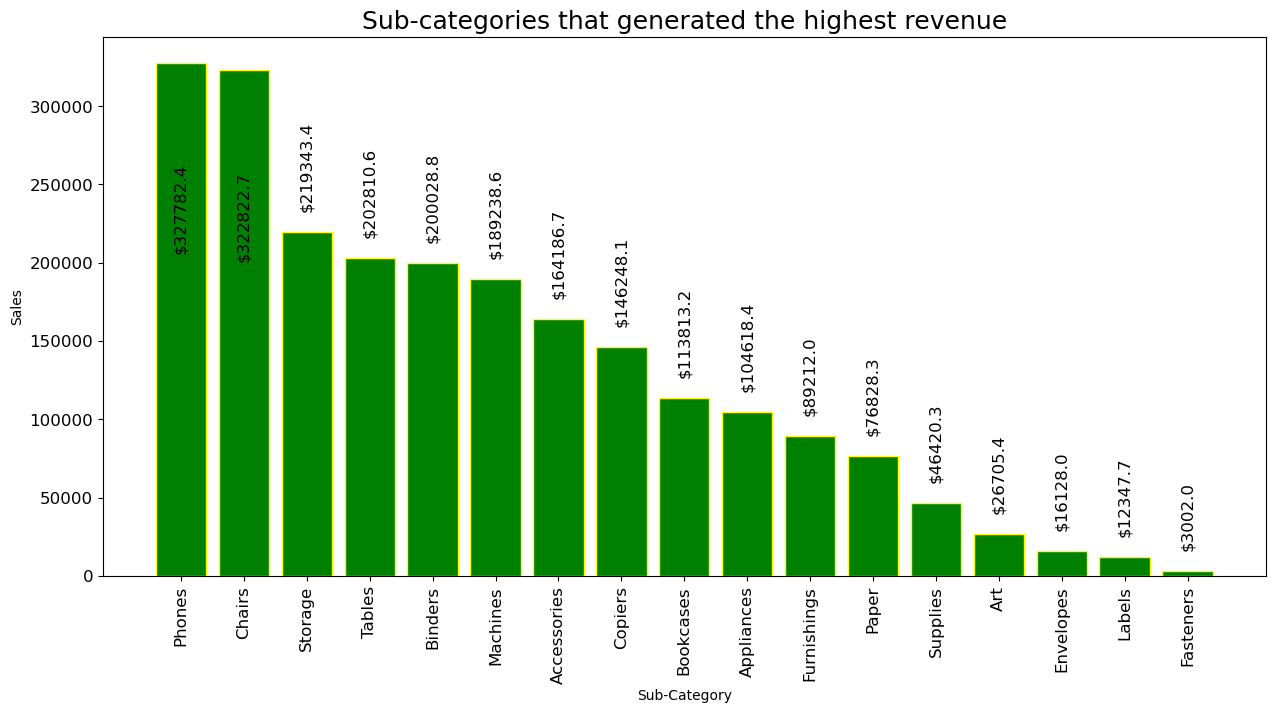

In [54]:
#plotting the sales by sub-category
plt.figure(figsize=(15,7))     # width and height of figure is defined in inches
plt.title("Sub-categories that generated the highest revenue", fontsize=18)
plt.bar(dfsub['Sub-Category'], dfsub["Sales"],color= 'green' ,edgecolor='yellow', linewidth = 1)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
for k,v in dfsub["Sales"].items(): #To show the exact revenue generated on the figure
    if v>300000:
        plt.text(k,v-120000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

plt.show()        

# Pivot tables and plotting

In [93]:
dfplot=df[['Category','Sub-Category','Region','Sales']]
dfplot.head()

,Category,Sub-Category,Region,Sales
0,Furniture,Bookcases,South,261.9600
1,Furniture,Chairs,South,731.9400
2,Office Supplies,Labels,West,14.6200
3,Furniture,Tables,South,957.5775
4,Office Supplies,Storage,South,22.3680


In [164]:
#Sales by Category in 4 regions
df1=pd.pivot_table(dfplot , values = 'Sales' , index = 'Category' , columns = 'Region' , aggfunc = 'sum')
df1

Region,Central,East,South,West
Category,,,,
Furniture,160317.4622,206461.388,116531.480,245348.2455
Office Supplies,163590.2430,199940.811,124424.771,217466.5090
Technology,168739.2080,263116.527,148195.208,247404.9300


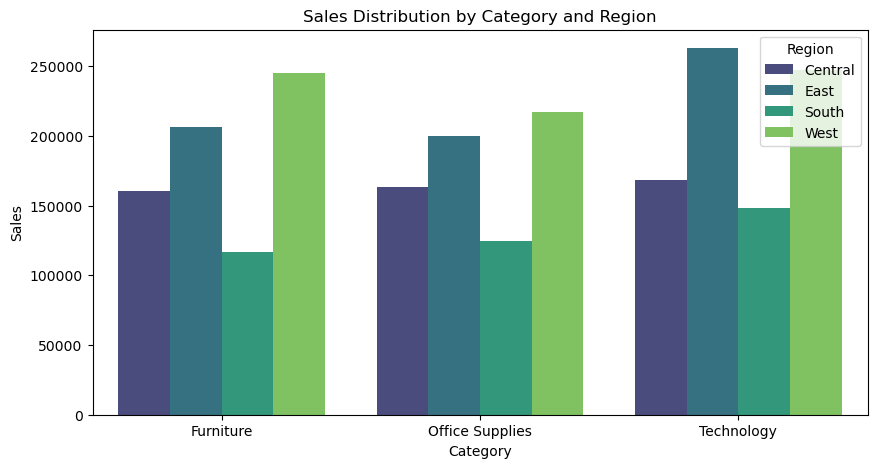

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df_melted, x='Category', y='Sales', hue='Region', palette='viridis')
plt.title("Sales Distribution by Category and Region")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


In [157]:
#Sales by Sub-Category in 4 regions
dfpiv = pd.pivot_table(dfplot , values = 'Sales' , index = 'Sub-Category' , columns = 'Region' , aggfunc = 'count')
dfpiv

Region,Central,East,South,West
Sub-Category,,,,
Accessories,174,203,125,254
Appliances,122,123,81,133
Art,175,225,140,245
Binders,362,427,241,462
Bookcases,49,70,28,79
Chairs,151,167,86,203
Copiers,16,20,7,23
Envelopes,58,70,54,66
Fasteners,53,61,29,71


# Sales by state and plotting

In [167]:
#lets review sales by state, on the second line we are rounding to 1 decimal point
#states sales are listed in the descending order
df = pd.read_csv("/Users/anands/Downloads/train.csv")
df.head()
dfstate = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) 
dfstate = dfstate[["Sales"]].round(1) 
dfstate.reset_index(inplace=True) 
dfstate



,State,Sales
0,California,446306.5
1,New York,306361.1
2,Texas,168572.5
3,Washington,135206.8
4,Pennsylvania,116276.6
5,Florida,88436.5
6,Illinois,79236.5
7,Michigan,76136.1
8,Ohio,75130.4
9,Virginia,70636.7


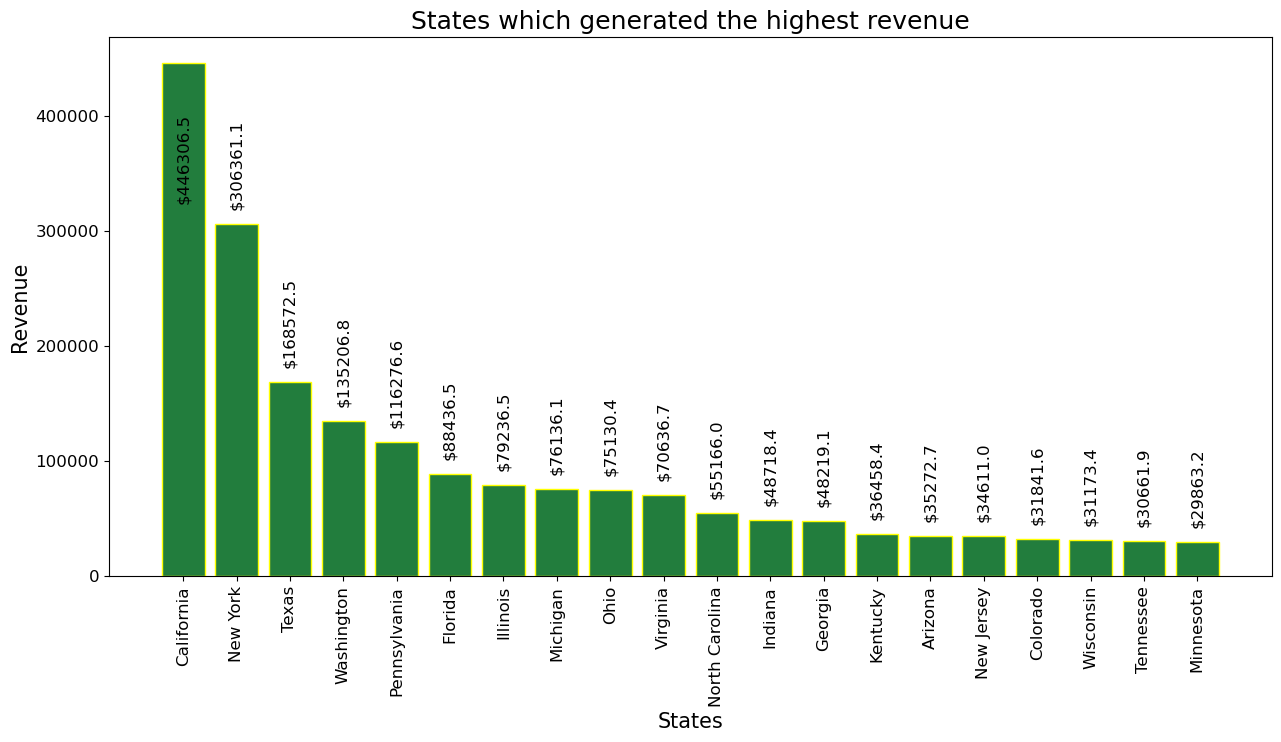

In [168]:
#plotting the sales by state table

plt.figure(figsize = (15,7)) # width and height of figure is defined in inches
plt.title("States which generated the highest revenue", fontsize=18) 
plt.bar(dfstate["State"], dfstate["Sales"],color= '#227d3d',edgecolor='yellow', linewidth = 1)
plt.xlabel("States",fontsize=15) # x axis shows the States
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in dfstate["Sales"].items(): #To show the exact revenue generated on the figure
    if v>400000:
        plt.text(k,v-120000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [169]:
#lets review sales by Category, on the second line we are rounding to 1 decimal point
#states sales are listed in the descending order

dfcat = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False).head() 
dfcat = dfcat[["Sales"]].round(1) 
dfcat.reset_index(inplace=True) 
dfcat

,Category,Sales
0,Technology,827455.9
1,Furniture,728658.6
2,Office Supplies,705422.3


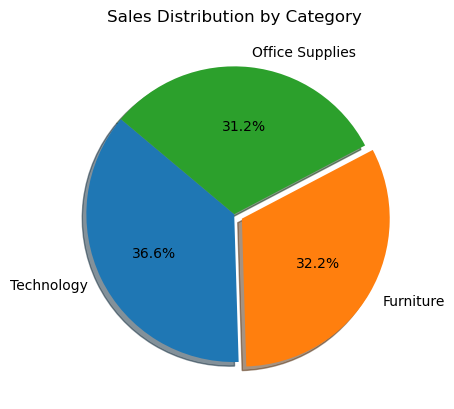

In [192]:


fig, ax = plt.subplots()
ax.pie(dfcat['Sales'], 
       labels=dfcat['Category'], 
       autopct='%1.1f%%',  # Displays percentage values
       shadow=True, 
       explode=[0, 0.06, 0], 
       startangle=140)  # Rotates for better visualization

plt.title("Sales Distribution by Category")
plt.show()




In [9]:
df.to_csv("/users/anands/Documents/ Superstore Sales Analysis1.csv", index=False)
